In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock symbols/stickers in the portfolio
#FAANG 
assets = ['FB','AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
# Assign Weights to the stocks 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
# Get the stock/portfolio starting date
StockStartDate = '2013-01-01'

In [5]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-07'

In [12]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [14]:
# Store the adjusted close price of the stock into the df
for stock in assets:
 df[stock] = web.DataReader(stock, data_source='yahoo', start = StockStartDate, end = today)['Adj Close']

In [15]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.039789,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.824715,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.356062,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.259851,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.303608,13.880000,365.280823
...,...,...,...,...,...
2021-02-01,262.010010,3342.879883,133.939850,539.039978,1901.349976
2021-02-02,267.079987,3380.000000,134.788589,548.159973,1927.510010
2021-02-03,266.649994,3312.530029,133.740158,539.450012,2070.070068


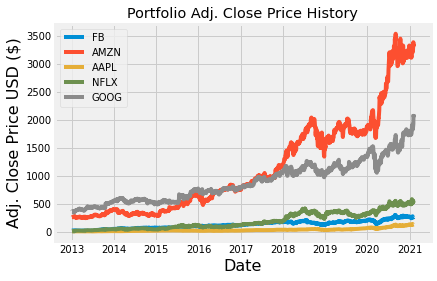

In [18]:
#Visualize the stock/portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Adj. Close Price USD ($)', fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [19]:
# Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-02-01,0.014245,0.042630,0.016520,0.012491,0.035740
2021-02-02,0.019350,0.011104,0.006337,0.016919,0.013759
2021-02-03,-0.001610,-0.019962,-0.007778,-0.015889,0.073961


In [21]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118707,0.055197,0.045220,0.057194,0.050682
AMZN,0.055197,0.094000,0.040152,0.064296,0.047880
AAPL,0.045220,0.040152,0.082215,0.035733,0.038662
NFLX,0.057194,0.064296,0.035733,0.213406,0.049696
GOOG,0.050682,0.047880,0.038662,0.049696,0.067089


In [22]:
 #Calculate the portfolio variance
 port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
 port_variance

0.06179377875600233

In [23]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24858354482145903

In [24]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3635648463114695

In [25]:
#Show the expected annual return, volatility(risk) and variance

percent_var = str(round(port_variance, 2) * 100)+ '%'
percent_vols = str(round(port_volatility, 2) * 100)+ '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100)+ '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility/risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 36.0%
Annual volatility/risk: 25.0%
Annual variance: 6.0%


In [26]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 2.9MB/s 


In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [28]:
#Portfolio Optimization

#Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.05588), ('AMZN', 0.31482), ('AAPL', 0.29101), ('NFLX', 0.33829), ('GOOG', 0.0)])
Expected annual return: 42.0%
Annual volatility: 27.3%
Sharpe Ratio: 1.46


(0.4196895321701384, 0.2733763895188571, 1.462048470512002)

In [29]:
0.05588 + 0.31482 + 0.29101 + 0.33829

1.0

In [37]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'FB': 4, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10}
Funds remaining: $691.23
